In [1]:
import pandas as pd
import os

In [2]:
from pyspark.sql import SparkSession

In [3]:
## Initialize the SparkSession
# appName is the name of the application
# getOrCreate() creates a new session or retrieves an existing one
spark = SparkSession.builder \
    .appName("MuseDash PySpark Learning") \
        .getOrCreate()

## Verify that SparkSession is created
spark

25/05/07 14:13:26 WARN Utils: Your hostname, Zipcoders-MacBook-Pro-8.local resolves to a loopback address: 127.0.0.1; using 192.168.3.96 instead (on interface en0)
25/05/07 14:13:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/07 14:13:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/07 14:13:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [8]:
try:
    df_status = spark.read.json ('./Data/status_change_events.json')
    print('Data loaded successfully')
except Exception as e:
    print(f'Error loading data: {e}')

df_status.show(5)

Data loaded successfully
+---------+-------------------+---------+------+-------------+--------+---------+-----+-----------+-------------+---------+-----+-------------+--------------------+------+-----+
|     auth|               city|firstName|gender|itemInSession|lastName|      lat|level|        lon| registration|sessionId|state|           ts|           userAgent|userId|  zip|
+---------+-------------------+---------+------+-------------+--------+---------+-----+-----------+-------------+---------+-----+-------------+--------------------+------+-----+
|Logged In|       Conshohocken|    Kezia|     F|            5|  Fowler|40.080337| paid| -75.300461|1714382893433|     1702|   PA|1714577869433|Mozilla/5.0 (Maci...|   813|19428|
|Logged In|          Las Vegas|     Jace|     M|            3| Patrick|36.111833| free|-115.211676|1714224142433|     1326|   NV|1714581991433|"Mozilla/5.0 (X11...|   691|89103|
|Logged In|          Milwaukee|  Zachary|     M|            3|Gonzalez|43.049005| fre

In [9]:
df_status = df_status.withColumnRenamed('level', 'subscription') #Change the column name from level to subscription

In [10]:
df_status.show(3)

+---------+------------+---------+------+-------------+--------+---------+------------+-----------+-------------+---------+-----+-------------+--------------------+------+-----+
|     auth|        city|firstName|gender|itemInSession|lastName|      lat|subscription|        lon| registration|sessionId|state|           ts|           userAgent|userId|  zip|
+---------+------------+---------+------+-------------+--------+---------+------------+-----------+-------------+---------+-----+-------------+--------------------+------+-----+
|Logged In|Conshohocken|    Kezia|     F|            5|  Fowler|40.080337|        paid| -75.300461|1714382893433|     1702|   PA|1714577869433|Mozilla/5.0 (Maci...|   813|19428|
|Logged In|   Las Vegas|     Jace|     M|            3| Patrick|36.111833|        free|-115.211676|1714224142433|     1326|   NV|1714581991433|"Mozilla/5.0 (X11...|   691|89103|
|Logged In|   Milwaukee|  Zachary|     M|            3|Gonzalez|43.049005|        free|  -88.04223|17144053734

In [11]:

# Select rows where any column has null values
from pyspark.sql.functions import col

df_status.filter(
	col('auth').isNull() | col('city').isNull() | col('firstName').isNull() |
	col('gender').isNull() | col('itemInSession').isNull() | col('lastName').isNull() |
	col('lat').isNull() | col('subscription').isNull() | col('lon').isNull() |
	col('registration').isNull() | col('sessionId').isNull() | col('state').isNull() |
	col('ts').isNull() | col('userAgent').isNull() | col('userId').isNull() | col('zip').isNull()
).show(10)


+----+----+---------+------+-------------+--------+---+------------+---+------------+---------+-----+---+---------+------+---+
|auth|city|firstName|gender|itemInSession|lastName|lat|subscription|lon|registration|sessionId|state| ts|userAgent|userId|zip|
+----+----+---------+------+-------------+--------+---+------------+---+------------+---------+-----+---+---------+------+---+
+----+----+---------+------+-------------+--------+---+------------+---+------------+---------+-----+---+---------+------+---+



In [12]:
df_status.where(df_status['sessionId'] == 1702).show()


+---------+------------+---------+------+-------------+--------+---------+------------+----------+-------------+---------+-----+-------------+--------------------+------+-----+
|     auth|        city|firstName|gender|itemInSession|lastName|      lat|subscription|       lon| registration|sessionId|state|           ts|           userAgent|userId|  zip|
+---------+------------+---------+------+-------------+--------+---------+------------+----------+-------------+---------+-----+-------------+--------------------+------+-----+
|Logged In|Conshohocken|    Kezia|     F|            5|  Fowler|40.080337|        paid|-75.300461|1714382893433|     1702|   PA|1714577869433|Mozilla/5.0 (Maci...|   813|19428|
+---------+------------+---------+------+-------------+--------+---------+------------+----------+-------------+---------+-----+-------------+--------------------+------+-----+



In [13]:
from pyspark.sql.functions import from_unixtime, col
# Convert the 'ts' column from Unix timestamp to a readable date format
df_status = df_status.withColumn('ts', from_unixtime(col('ts') / 1000, 'yyyy-MM-dd HH:mm:ss'))

In [14]:
df_status.filter(col('ts').isNull()).show(5)

+----+----+---------+------+-------------+--------+---+------------+---+------------+---------+-----+---+---------+------+---+
|auth|city|firstName|gender|itemInSession|lastName|lat|subscription|lon|registration|sessionId|state| ts|userAgent|userId|zip|
+----+----+---------+------+-------------+--------+---+------------+---+------------+---------+-----+---+---------+------+---+
+----+----+---------+------+-------------+--------+---+------------+---+------------+---------+-----+---+---------+------+---+



In [15]:
#move columns around
df_status = df_status.select(col('userId'), col('lastName'), col('firstName'), col('gender'), col('sessionId'), col('itemInSession'), col('subscription'), col('ts'), col('city'), col('state'), col('zip'), col('lat'), col('lon'), col('userAgent'), col('auth'))
df_status.show(10)


+------+--------+---------+------+---------+-------------+------------+-------------------+-------------------+-----+-----+---------+-----------+--------------------+---------+
|userId|lastName|firstName|gender|sessionId|itemInSession|subscription|                 ts|               city|state|  zip|      lat|        lon|           userAgent|     auth|
+------+--------+---------+------+---------+-------------+------------+-------------------+-------------------+-----+-----+---------+-----------+--------------------+---------+
|   813|  Fowler|    Kezia|     F|     1702|            5|        paid|2024-05-01 11:37:49|       Conshohocken|   PA|19428|40.080337| -75.300461|Mozilla/5.0 (Maci...|Logged In|
|   691| Patrick|     Jace|     M|     1326|            3|        free|2024-05-01 12:46:31|          Las Vegas|   NV|89103|36.111833|-115.211676|"Mozilla/5.0 (X11...|Logged In|
|   983|Gonzalez|  Zachary|     M|     1820|            3|        free|2024-05-02 07:35:21|          Milwaukee|   W

In [16]:
df_status.printSchema()

root
 |-- userId: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- subscription: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- auth: string (nullable = true)



In [17]:
try:
    df_listen = spark.read.json ('./Data/listen_events.json')
    print('Data loaded successfully')
except Exception as e:
    print(f'Error loading data: {e}')

df_listen.show(5)

Data loaded successfully
+--------------------+---------+---------+---------+---------+------+-------------+--------+---------+-----+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|              artist|     auth|     city| duration|firstName|gender|itemInSession|lastName|      lat|level|       lon| registration|sessionId|                song|state|           ts|           userAgent|userId|  zip|
+--------------------+---------+---------+---------+---------+------+-------------+--------+---------+-----+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|John Fred & His P...|Logged In|   Covert|171.80688|     Vera|     F|            2| Stanley|42.285992| paid|-86.268503|1713855719433|     1498|    Judy In Disguise|   MI|1714574635433|Mozilla/5.0 (Wind...|   851|49043|
|    Transvision Vamp|Logged In| Gas City|209.91956|   Landon|     M|           17|  Lucero|40.4798

In [18]:
df_listen = df_listen.withColumnRenamed('level', 'subscription') #Change the column name from level to subscription

In [19]:
df_listen.show(3)

+--------------------+---------+---------+---------+---------+------+-------------+--------+---------+------------+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|              artist|     auth|     city| duration|firstName|gender|itemInSession|lastName|      lat|subscription|       lon| registration|sessionId|                song|state|           ts|           userAgent|userId|  zip|
+--------------------+---------+---------+---------+---------+------+-------------+--------+---------+------------+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|John Fred & His P...|Logged In|   Covert|171.80688|     Vera|     F|            2| Stanley|42.285992|        paid|-86.268503|1713855719433|     1498|    Judy In Disguise|   MI|1714574635433|Mozilla/5.0 (Wind...|   851|49043|
|    Transvision Vamp|Logged In| Gas City|209.91956|   Landon|     M|           17|  Lucero|40.4

In [20]:

paid_df = df_listen.filter(col('subscription') == 'paid')

    # Select relevant columns
paid_df = paid_df.select('userId', 'artist', 'song', 'subscription', 'city', 'state')

    # Show the first 5 rows
paid_df.show(5)

+------+--------------------+--------------------+------------+---------+-----+
|userId|              artist|                song|subscription|     city|state|
+------+--------------------+--------------------+------------+---------+-----+
|   851|John Fred & His P...|    Judy In Disguise|        paid|   Covert|   MI|
|    24|    Transvision Vamp|    I Want Your Love|        paid| Gas City|   IN|
|   851| Theory Of A Deadman|   End Of The Summer|        paid|   Covert|   MI|
|   309|           Aerosmith|               Crazy|        paid|  Liberty|   TX|
|   278|London Symphony O...|Swan Lake Op. 20 ...|        paid|Owensboro|   KY|
+------+--------------------+--------------------+------------+---------+-----+
only showing top 5 rows



In [21]:
from pyspark.sql.functions import count
#Group by artist, count the occurences, and sort in descending order
artist_counts = paid_df.groupBy('artist').agg(count('*').alias('count')).orderBy(col('count').desc())
# Show the top 10 artists for paid users
artist_counts.show(5)

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|       Kings Of Leon| 8811|
|            Coldplay| 8513|
|Florence + The Ma...| 5966|
|       Dwight Yoakam| 5508|
|            BjÃÂ¶rk| 5450|
+--------------------+-----+
only showing top 5 rows



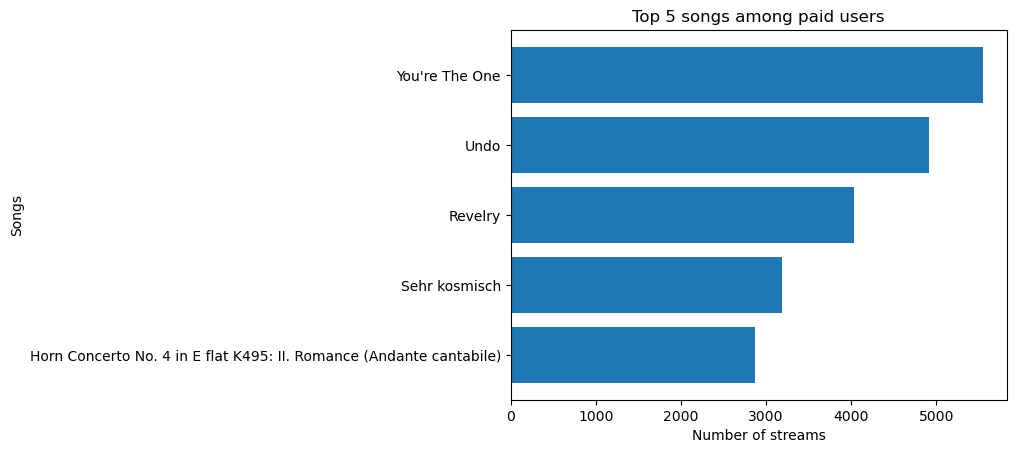

In [39]:
def top_paid_songs():
    """
    Function to find top 5 songs for paid users
    """
    paid_df = df_listen.filter(col('subscription') == 'paid')
    # Group by song, count the occurrences, and sort in descending order
    song_counts = paid_df.groupBy('song').agg(count('*').alias('count')).orderBy(col('count').desc())

    top_songs = song_counts.limit(5).collect()

    songs = [row ['song'] for row in top_songs][::-1]
    counts = [row ['count'] for row in top_songs][::-1]

    import matplotlib.pyplot as plt
    plt.barh(songs, counts)
    plt.ylabel("Songs")
    plt.xlabel("Number of streams")
    plt.title("Top 5 songs among paid users")
    plt.show()
top_paid_songs()
    


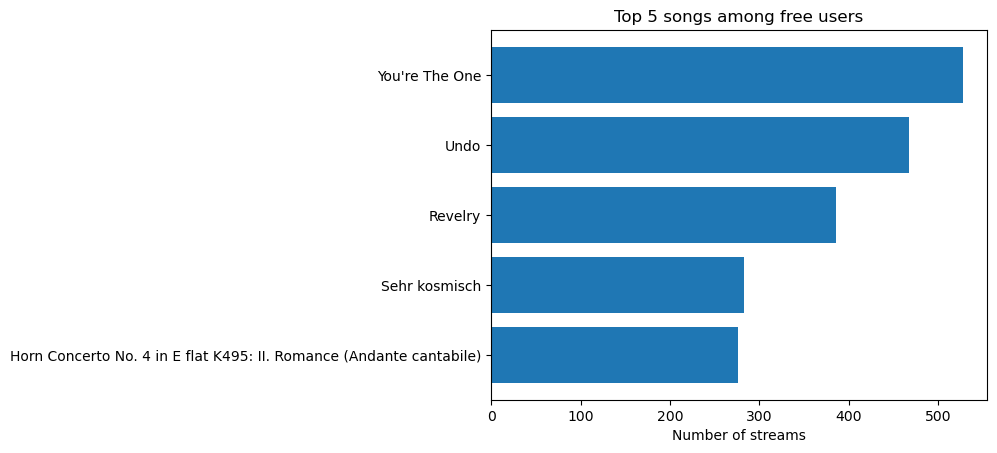

In [38]:
def top_free_songs():
    """
    Function to find top 5 songs for free users
    """
    free_df = df_listen.filter(col('subscription') == 'free')

    # Select relevant columns
    free_df = free_df.select('userId', 'artist', 'song', 'subscription', 'city', 'state')

    # Group by song, count the occurrences, and sort in descending order
    song_counts = free_df.groupBy('song').agg(count('*').alias('count')).orderBy(col('count').desc())

    top_songs = song_counts.limit(5).collect()

    songs = [row ['song'] for row in top_songs][::-1]
    counts = [row ['count'] for row in top_songs][::-1]

    import matplotlib.pyplot as plt
    plt.barh(songs, counts)
    plt.xlabel("Number of streams")
    plt.title("Top 5 songs among free users")
    plt.show()
top_free_songs()
    

In [39]:
from pyspark.sql.functions import when, col

# Fix Bjork's name
# When condition: if the artist name contains 'Bj', replace it with 'Bjork'
# Otherwise, keep the original name

artist_counts = artist_counts.withColumn(
    'artist',
    when(col('artist').contains('Bj'), 'Bjork').otherwise(col('artist'))
)

# Verify the changes
artist_counts.show(5)

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|       Kings Of Leon| 8811|
|            Coldplay| 8513|
|Florence + The Ma...| 5966|
|       Dwight Yoakam| 5508|
|               Bjork| 5450|
+--------------------+-----+
only showing top 5 rows



/Users/isiah/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


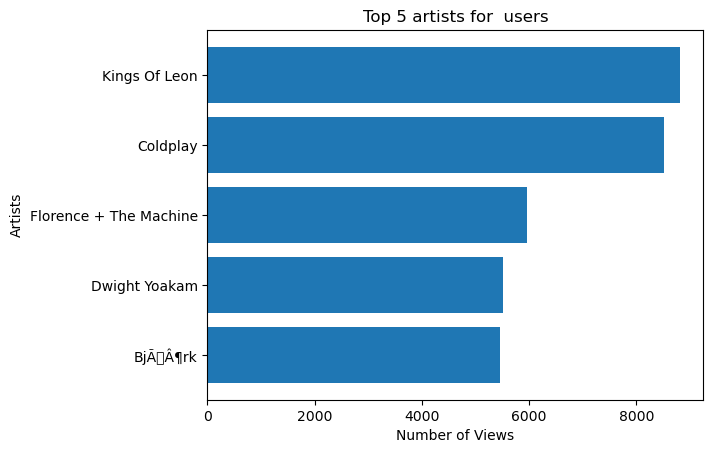

In [31]:
def paid_top_artists():
    """
    Function to analyze paid user's top artists.
    Filters the DataFrame for paid users, groups by artist, counts occurrences,
    and visualizes the top 5 artists for paid users.
    """
    from pyspark.sql.functions import col, count

    # Filter for free users
    paid_df = df_listen.filter(col('subscription') == 'paid')

    # Select relevant columns
    paid_df = paid_df.select('userId', 'artist', 'song', 'subscription', 'city', 'state')

    # Group by artist, count occurrences, and sort in descending order
    paid_artist_counts = paid_df.groupBy('artist').agg(count('*').alias('count')).orderBy(col('count').desc())

    # Limit to top 5 artists and collect results
    top_artists = paid_artist_counts.limit(5).collect()

    # Prepare data for visualization
    artists = [row['artist'] for row in top_artists][::-1]
    counts = [row['count'] for row in top_artists][::-1]

    # Create a horizontal bar chart using Pygal
    import matplotlib.pyplot as plt
    plt.barh(artists, counts)
    plt.xlabel("Number of Views")
    plt.title("Top 5 artists for paid users")
    plt.show()
paid_top_artists()

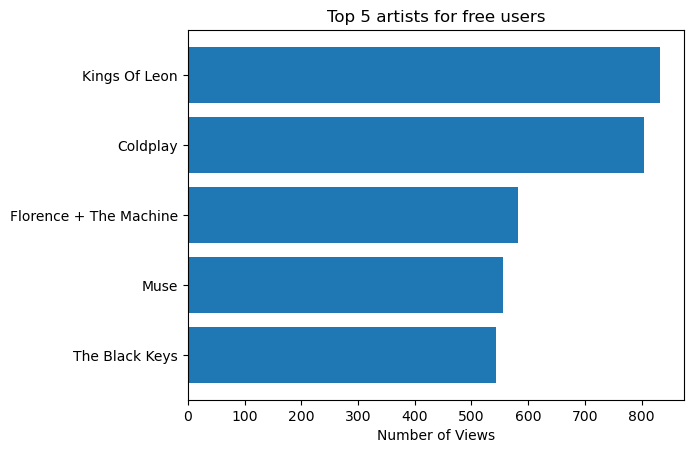

In [36]:
def free_users():
    """
    Function to analyze free user's top artists.
    Filters the DataFrame for free users, groups by artist, counts occurrences,
    and visualizes the top 5 artists for free users.
    """
    from pyspark.sql.functions import col, count

    # Filter for free users
    free_df = df_listen.filter(col('subscription') == 'free')

    # Select relevant columns
    free_df = free_df.select('userId', 'artist', 'song', 'subscription', 'city', 'state')

    # Group by artist, count occurrences, and sort in descending order
    free_artist_counts = free_df.groupBy('artist').agg(count('*').alias('count')).orderBy(col('count').desc())

    # Limit to top 5 artists and collect results
    top_artists = free_artist_counts.limit(5).collect()

    # Prepare data for visualization
    artists = [row['artist'] for row in top_artists][::-1]
    counts = [row['count'] for row in top_artists][::-1]

    # Create a horizontal bar chart using Pygal
    import matplotlib.pyplot as plt
    plt.barh(artists, counts)
    plt.xlabel("Number of Views")
    plt.title("Top 5 artists for free users")
    plt.show()
free_users()